# ClusterAI 2020
## Ciencia de Datos - Ingenieria Industrial UTN BA¶
## Curso I5521
### Trabajo Final: Tarjeta AlimentAR

#### Elaborado por: Ramiro Paz (Alumno Oyente)


In [1]:
pip install geopandas


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install descartes

Note: you may need to restart the kernel to use updated packages.


## Librerías a Importar

In [108]:
#Importar líbrerias útiles al análisis de datos
 
#LIB de Datos
import pandas as pd
import numpy as np

#LIB de Gráficos
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from descartes import PolygonPatch
from shapely.geometry import Point
from mpl_toolkits.axes_grid1 import make_axes_locatable

#Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVR
from sklearn.linear_model import LassoCV, SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler


In [109]:
#Importamos un mapamundi de ARG para utilizar con GeoPandas
mapamundi=gpd.GeoDataFrame.from_file(r'/Users/ramiropaz/Library/Containers/com.microsoft.Excel/Data/Desktop/Data Science/Trabajo Final Cluster AI/ign_provincia.shp')
mapamundi

OBJECTID  Entidad     Objeto  \
0        427        0  Provincia   
1        428        0  Provincia   
2        429        0  Provincia   
3        430        0  Provincia   
4        431        0  Provincia   
5        432        0  Provincia   
6        433        0  Provincia   
7        434        0  Provincia   
8        435        0  Provincia   
9        436        0  Provincia   
10       437        0  Provincia   
11       438        0  Provincia   
12       439        0  Provincia   
13       440        0  Provincia   
14       441        0  Provincia   
15       442        0  Provincia   
16       443        0  Provincia   
17       444        0  Provincia   
18       445        0  Provincia   
19       446        0  Provincia   
20       447        0  Provincia   
21       448        0  Provincia   
22       449        0  Provincia   
23       450        0  Provincia   

                                                  FNA              GNA  \
0                     Ciudad Autónoma de Buenos Aires  Ciudad Autónoma   
1                               Provincia del Neuquén        Provincia   
2                               Provincia de La Pampa        Provincia   
3                                Provincia de Mendoza        Provincia   
4                               Provincia de San Luis        Provincia   
5                                Provincia de Córdoba        Provincia   
6                               Provincia de Santa Fe        Provincia   
7                             Provincia de Entre Ríos        Provincia   
8                               Provincia de San Juan        Provincia   
9                               Provincia de La Rioja        Provincia   
10                             Provincia de Catamarca        Provincia   
11                               Provincia de Tucumán        Provincia   
12                                 Provincia de Jujuy        Provincia   
13                                Provincia del Chaco        Provincia   
14                               Provincia de Formosa        Provincia   
15                   Provincia de Santiago del Estero        Provincia   
16  Provincia de Tierra del Fuego, Antártida e Isl...        Provincia   
17                            Provincia de Santa Cruz        Provincia   
18                               Provincia del Chubut        Provincia   
19                             Provincia de Río Negro        Provincia   
20                          Provincia de Buenos Aires        Provincia   
21                            Provincia de Corrientes        Provincia   
22                              Provincia de Misiones        Provincia   
23                                 Provincia de Salta        Provincia   

                                                  NAM  SAG        FDC IN1  \
0                     Ciudad Autónoma de Buenos Aires  IGN  Geografía  02   
1                                             Neuquén  IGN  Geografía  58   
2                                            La Pampa  IGN  Geografía  42   
3                                             Mendoza  IGN  Geografía  50   
4                                            San Luis  IGN  Geografía  74   
5                                             Córdoba  IGN  Geografía  14   
6                                            Santa Fe  IGN  Geografía  82   
7                                          Entre Ríos  IGN  Geografía  30   
8                                            San Juan  IGN  Geografía  70   
9                                            La Rioja  IGN  Geografía  46   
10                                          Catamarca  IGN  Geografía  10   
11                                            Tucumán  IGN  Geografía  90   
12                                              Jujuy  IGN  Geografía  38   
13                                              Chaco  IGN  Geografía  22   
14                                            Formosa  IGN  Geografía  34   
15                  

In [110]:
np.shape(mapamundi)

(24, 12)

## DataSet Elegido

El dataset elegido se encuentra en el siguiente enlace: 

https://datos.gob.ar/dataset/desarrollo-social-titulares-tarjeta-alimentar/archivo/desarrollo-social_243dcc53-9a4f-4abf-8d4d-ea6a36167f93

El mismo pertenece a los datos abiertos del gobierno nacional. 

In [111]:
alimentar = pd.read_csv ('/Users/ramiropaz/Library/Containers/com.microsoft.Excel/Data/Desktop/Data Science/Trabajo Final Cluster AI/Titulares_Tarjeta_Alimentar-20200909.csv')
poblacion = pd.read_csv('/Users/ramiropaz/Library/Containers/com.microsoft.Excel/Data/Desktop/Data Science/Trabajo Final Cluster AI/Poblacion.csv')
incidencia = pd.read_csv('/Users/ramiropaz/Library/Containers/com.microsoft.Excel/Data/Desktop/Data Science/Trabajo Final Cluster AI/incidencia.csv')

In [112]:
filas = np.shape(alimentar)[0]
print(f'Filas: {filas}')

columnas = np.shape(alimentar)[1]
print(f'Columnas:{columnas}\r\n')

print('Esta sería la base de datos:')
alimentar.head(5)

Filas: 1048575
Columnas:10

Esta sería la base de datos:


id_persona sexo  codigo_indec_provincia  \
0  6980F581-4E89-49FF-BC5F-70FBEFF94F9D    F                       6   
1  890A770A-8EA6-4458-96BD-1DF39C7E3C1E    M                       6   
2  313C4CA6-282A-4383-8CDE-4221CA51A35B    F                       6   
3  8C3EF971-23BF-4E23-8A39-A6B66123797B    F                      18   
4  D18919D7-7488-43B1-97BB-4D3CE070C5AC    F                      82   

      provincia  codigo_indec_departamento        departamento fecha_alta  \
0  Buenos Aires                       6434               Lanús     5/1/20   
1  Buenos Aires                       6260  Esteban Echeverría     5/1/20   
2  Buenos Aires                       6749        San Fernando     5/1/20   
3    Corrientes                      18042           Empedrado     5/1/20   
4      Santa Fe                      82119         San Lorenzo     5/1/20   

   fecha_baja  monto_mensual  meses_liquidados  
0         NaN           4000                 5  
1         NaN           4000                 5  
2         NaN           4000                 5  
3         NaN           4000                 5  
4         NaN           4000                 5

## Limpieza de Datos

Se procederá a limpiar los datos de la base. Vamos a analizar:

Duplicados

Valores Nulos (NaN's)

Reemplazo de valores

En todos los casos de verá si aplicá hacer el ejercicio o no

In [113]:
#Eliminar registros de personas duplicadas, si los hubiera
alimentar.drop_duplicates(subset=['id_persona'],keep='last')
alimentar.head(5)

id_persona sexo  codigo_indec_provincia  \
0  6980F581-4E89-49FF-BC5F-70FBEFF94F9D    F                       6   
1  890A770A-8EA6-4458-96BD-1DF39C7E3C1E    M                       6   
2  313C4CA6-282A-4383-8CDE-4221CA51A35B    F                       6   
3  8C3EF971-23BF-4E23-8A39-A6B66123797B    F                      18   
4  D18919D7-7488-43B1-97BB-4D3CE070C5AC    F                      82   

      provincia  codigo_indec_departamento        departamento fecha_alta  \
0  Buenos Aires                       6434               Lanús     5/1/20   
1  Buenos Aires                       6260  Esteban Echeverría     5/1/20   
2  Buenos Aires                       6749        San Fernando     5/1/20   
3    Corrientes                      18042           Empedrado     5/1/20   
4      Santa Fe                      82119         San Lorenzo     5/1/20   

   fecha_baja  monto_mensual  meses_liquidados  
0         NaN           4000                 5  
1         NaN           4000                 5  
2         NaN           4000                 5  
3         NaN           4000                 5  
4         NaN           4000                 5

In [114]:
filas2 = np.shape(alimentar)[0]
print (f'Filas:{filas2}\r\n')
print('se observa el mismo número de filas, por lo que los registros de usuarios son únicos en el dataset')

Filas:1048575

se observa el mismo número de filas, por lo que los registros de usuarios son únicos en el dataset


In [115]:
#Analizar los posibles NaN's del dataset y entender que hacer con ellos
col_NaN = alimentar.isnull().any()
print (col_NaN,'\r\n')
print('solo la columna ¨fecha_baja¨ contiene valores nulos')

id_persona                   False
sexo                         False
codigo_indec_provincia       False
provincia                    False
codigo_indec_departamento    False
departamento                 False
fecha_alta                   False
fecha_baja                    True
monto_mensual                False
meses_liquidados             False
dtype: bool 

solo la columna ¨fecha_baja¨ contiene valores nulos


In [116]:
#Cantidad de valores nulos contenidos en la columna 'fecha_baja'
total_NaN = alimentar.isnull().sum()
print(total_NaN,'\r\n')
print ('todos los valores de la columna ¨fecha baja¨ son nulos')

id_persona                         0
sexo                               0
codigo_indec_provincia             0
provincia                          0
codigo_indec_departamento          0
departamento                       0
fecha_alta                         0
fecha_baja                   1048575
monto_mensual                      0
meses_liquidados                   0
dtype: int64 

todos los valores de la columna ¨fecha baja¨ son nulos


In [117]:
#Borramos columna 'fecha_baja', dado que no es útil para el análisis. Se infiere que todos los registros únicos de personas no se bajaron del programa
alimentar.dropna(axis = 'columns',how = 'all',inplace = True)

In [118]:
# Verificamos como quedo el dataset
print(f'Nos quedamos con un dataframe de {alimentar.shape[0]} filas x {alimentar.shape[1]} columnas')

Nos quedamos con un dataframe de 1048575 filas x 9 columnas


In [119]:
alimentar.head(5)

id_persona sexo  codigo_indec_provincia  \
0  6980F581-4E89-49FF-BC5F-70FBEFF94F9D    F                       6   
1  890A770A-8EA6-4458-96BD-1DF39C7E3C1E    M                       6   
2  313C4CA6-282A-4383-8CDE-4221CA51A35B    F                       6   
3  8C3EF971-23BF-4E23-8A39-A6B66123797B    F                      18   
4  D18919D7-7488-43B1-97BB-4D3CE070C5AC    F                      82   

      provincia  codigo_indec_departamento        departamento fecha_alta  \
0  Buenos Aires                       6434               Lanús     5/1/20   
1  Buenos Aires                       6260  Esteban Echeverría     5/1/20   
2  Buenos Aires                       6749        San Fernando     5/1/20   
3    Corrientes                      18042           Empedrado     5/1/20   
4      Santa Fe                      82119         San Lorenzo     5/1/20   

   monto_mensual  meses_liquidados  
0           4000                 5  
1           4000                 5  
2           4000                 5  
3           4000                 5  
4           4000                 5

In [120]:
#Pasamos los valores númericos a float
alimentar['monto_mensual'] = alimentar['monto_mensual'].astype(float)
alimentar['meses_liquidados'] = alimentar['meses_liquidados'].astype(float)
alimentar['fecha_alta'] = pd.to_datetime(alimentar['fecha_alta'])

In [121]:
#Creamos la columna que se llame 'Monto Total', ya que la columna 'monto_liquidado' es por mes individual
alimentar['total_liquidado']=alimentar['monto_mensual']*alimentar['meses_liquidados']

In [122]:
alimentar.head(3)

id_persona sexo  codigo_indec_provincia  \
0  6980F581-4E89-49FF-BC5F-70FBEFF94F9D    F                       6   
1  890A770A-8EA6-4458-96BD-1DF39C7E3C1E    M                       6   
2  313C4CA6-282A-4383-8CDE-4221CA51A35B    F                       6   

      provincia  codigo_indec_departamento        departamento fecha_alta  \
0  Buenos Aires                       6434               Lanús 2020-05-01   
1  Buenos Aires                       6260  Esteban Echeverría 2020-05-01   
2  Buenos Aires                       6749        San Fernando 2020-05-01   

   monto_mensual  meses_liquidados  total_liquidado  
0         4000.0               5.0          20000.0  
1         4000.0               5.0          20000.0  
2         4000.0               5.0          20000.0

## Análisis Categorías 

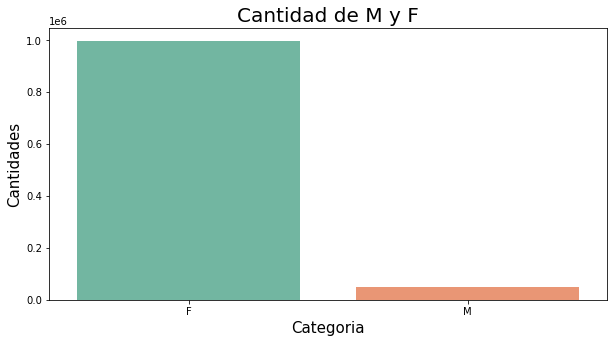

In [123]:
#Veremos cual es la cantidad de M y F que tenemos en la base de datos, según la columna 'sexo'
plt.figure(figsize=(10,5))
sns.countplot(x="sexo", data=alimentar,palette = "Set2")
plt.title('Cantidad de M y F', size = 20)
plt.xlabel("Categoria", size = 15)
plt.ylabel("Cantidades", size = 15)
plt.show()


In [124]:
#Vemos la cantidad de M y F que hay exacto según el gráfico de columnas
serie = pd.Series(alimentar.sexo)
serie.value_counts()

F    997652
M     50923
Name: sexo, dtype: int64

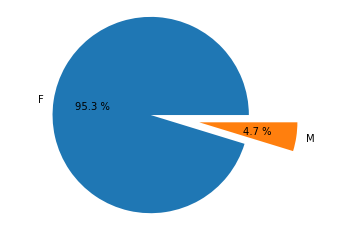

In [125]:
#En base a estos datos, vemos un gràfico de torta, para ver su porcentaje 
nombres='F','M'
cantidad=[1457674,72479]
desfase=(0,0.5)
plt.pie(cantidad,labels=nombres,autopct="%0.1f %%",explode=desfase)
plt.axis("equal")
plt.show()

Lo primero que podemos observar es que predomina el sexo Femenino en el dataset. El 95% de las personas que piden este plan son mujeres.

In [126]:
#Ahora analizaremos la incidencia de las provincias en el plan AlimentAR
serie = pd.Series(alimentar.provincia)
serie.value_counts()

Buenos Aires              227589
Córdoba                   116970
Santa Fe                   82640
Tucumán                    70860
Mendoza                    69379
Misiones                   63616
Santiago del Estero        52793
Corrientes                 52467
Ciudad de Buenos Aires     41077
Entre Ríos                 37931
San Juan                   33280
Formosa                    32489
Jujuy                      31648
Río Negro                  20293
San Luis                   16872
Catamarca                  16674
Neuquén                    16305
La Rioja                   15357
Chubut                     12756
La Pampa                   10289
Santa Cruz                  9530
Chaco                       7454
Salta                       6880
Tierra del Fuego            3426
Name: provincia, dtype: int64

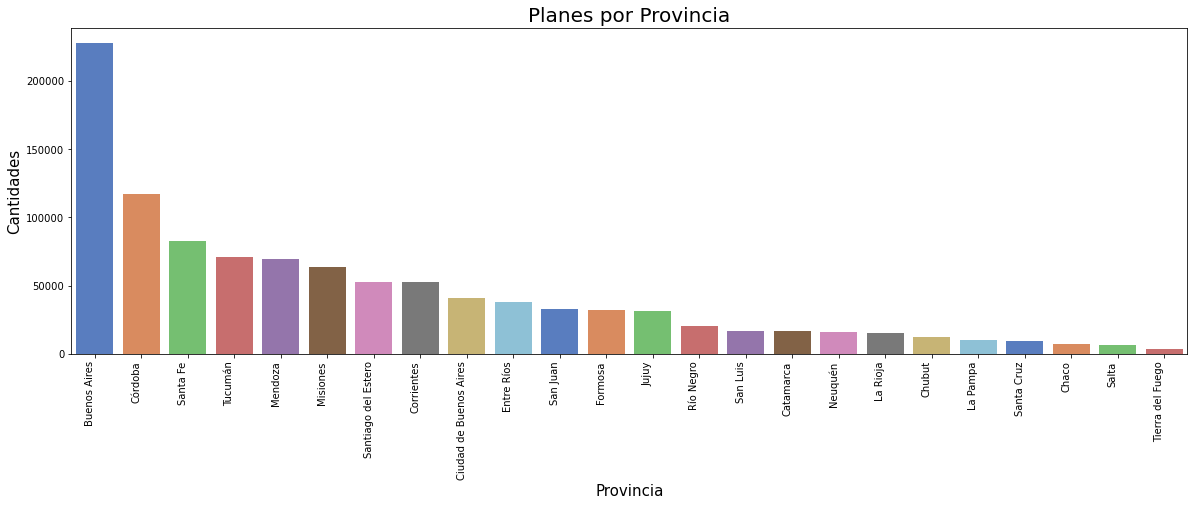

In [136]:
#Gráficamos la tabla anterior, mostrando las provincias en un gráfico de columnas
top_n = 24
idx_top = alimentar['provincia'].value_counts(ascending=False).index[0:top_n]

plt.figure(figsize=(20,6))
g=sns.countplot(x="provincia", data=alimentar,order=idx_top,palette = "muted")
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title('Planes por Provincia', size = 20)
plt.xlabel("Provincia", size = 15)
plt.ylabel("Cantidades", size = 15)
plt.show()

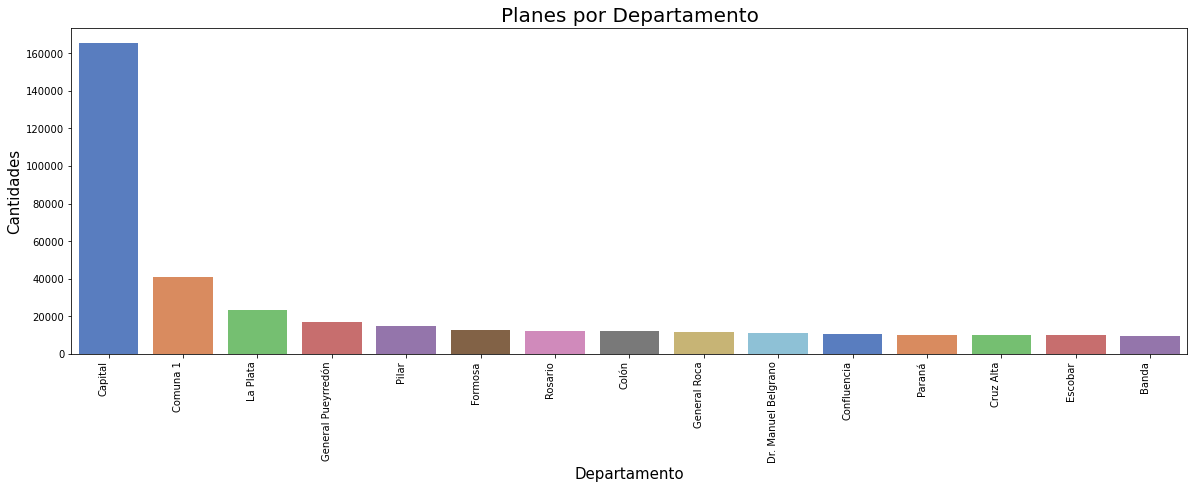

In [135]:
#Siguiendo la línea de análisis general, vamos a ver un top 15 de departamentos que solicitan el plan AlimentAR
top_n = 15
idx_top = alimentar['departamento'].value_counts(ascending=False).index[0:top_n]

plt.figure(figsize=(20,6))
g=sns.countplot(x="departamento", data=alimentar,order=idx_top,palette = "muted")
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title('Planes por Departamento', size = 20)
plt.xlabel("Departamento", size = 15)
plt.ylabel("Cantidades", size = 15)
plt.show()

Se observa que 'La Capital' es un valor muy similar a 'Capital'. Vamos a juntar todo en concepto 'Capital', haciendo referencia a las capitales de las provincias de Argentina

In [129]:
#Reemplaamos 'La Capital' por 'Capital'
alimentar['departamento'] = alimentar['departamento'].str.replace('La Capital','Capital')

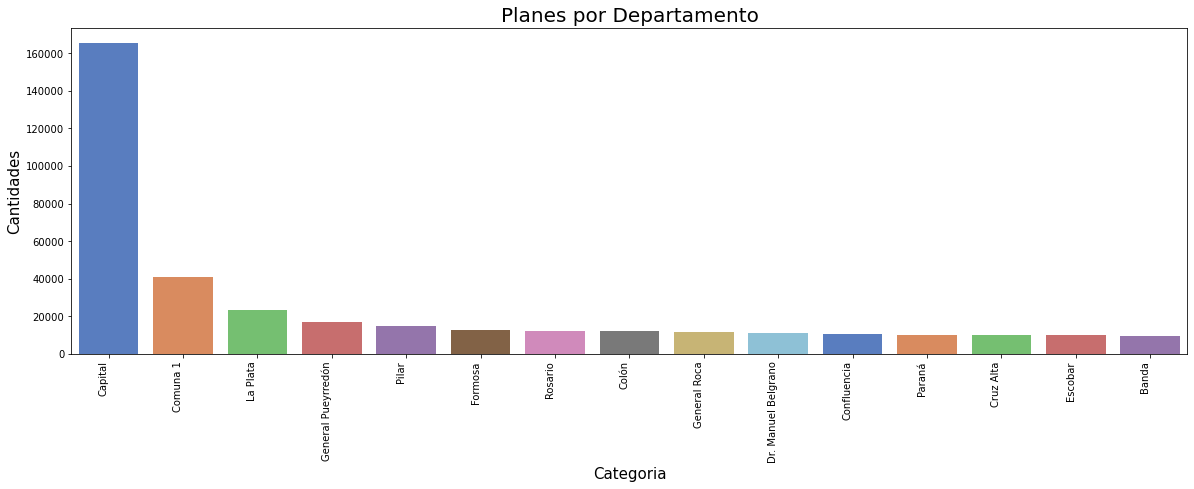

In [130]:
#Habiendo reemplazado 'La Capital' por 'Capital'
top_n = 15
idx_top = alimentar['departamento'].value_counts(ascending=False).index[0:top_n]

plt.figure(figsize=(20,6))
g=sns.countplot(x="departamento", data=alimentar,order=idx_top,palette = "muted")
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title('Planes por Departamento', size = 20)
plt.xlabel("Categoria", size = 15)
plt.ylabel("Cantidades", size = 15)
plt.show()

In [131]:
#Ahora analizaremos la incidencia de las provincias en el plan AlimentAR
serie = pd.Series(alimentar.meses_liquidados)
serie.value_counts()

7.0    566726
8.0    432210
9.0     49189
5.0       450
Name: meses_liquidados, dtype: int64

Text(0.5, 1.0, 'Histogram of Meses Liquidados')

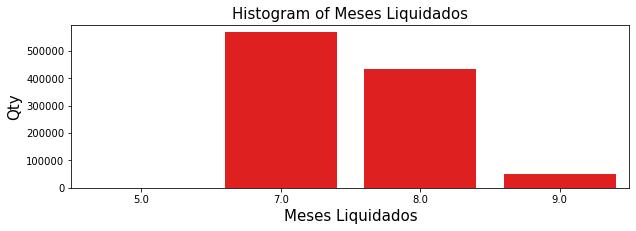

In [132]:
#Si hicieramos un histograma de los valores obtenidos
plt.figure(figsize=(10,3))
sns.countplot(alimentar.meses_liquidados, color="Red")
plt.xlabel("Meses Liquidados",size = 15)
plt.ylabel("Qty",size = 15)
plt.title('Histogram of Meses Liquidados',size = 15)

Del casi 1.5M de registros de personas únicos, solo 450 hicieron uso del plan durante 5 meses, siendo que la mayor concentración esta entre 7 y 8 meses. 


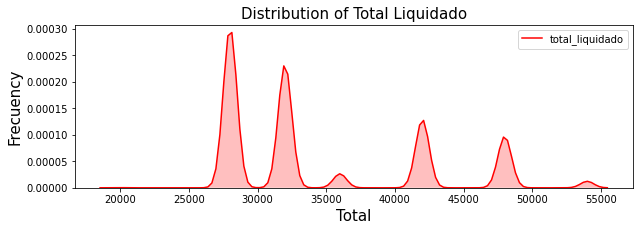

Text(0.5, 1.0, 'Histogram of Total Liquidado')

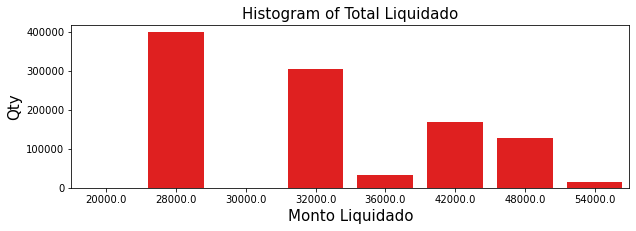

In [133]:
#Si hicieramos un histograma del valor total liquidado por persona única
plt.figure(figsize=(10,3))
sns.kdeplot(alimentar['total_liquidado'], color= "Red", shade = True)
plt.xlabel("Total",size = 15)
plt.ylabel("Frecuency",size = 15)
plt.title('Distribution of Total Liquidado',size = 15)
plt.show()

plt.figure(figsize=(10,3))
sns.countplot(alimentar.total_liquidado, color="Red")
plt.xlabel("Monto Liquidado",size = 15)
plt.ylabel("Qty",size = 15)
plt.title('Histogram of Total Liquidado',size = 15)

In [29]:
#Veamos la cantidad de registros únicos que cobraron esos montos expresados en el gráfico anterior
serie = pd.Series(alimentar.total_liquidado)
serie.value_counts()

28000.0    398132
32000.0    305077
42000.0    168594
48000.0    127133
36000.0     33637
54000.0     15552
20000.0       353
30000.0        97
Name: total_liquidado, dtype: int64

In [30]:
#Se propone definir 4 Bandas para analizar. (20k-30k)(30k-40k)(40k-50k)(+50k)
alimentar.loc[(alimentar['total_liquidado'] > 20000) & (alimentar['total_liquidado'] <= 30000), 'Banda']   = 1
alimentar.loc[(alimentar['total_liquidado'] > 30000) & (alimentar['total_liquidado'] <= 40000), 'Banda']   = 2
alimentar.loc[(alimentar['total_liquidado'] > 40000) & (alimentar['total_liquidado'] <= 50000), 'Banda']   = 3
alimentar.loc[(alimentar['total_liquidado'] > 50000), 'Banda']  = 4

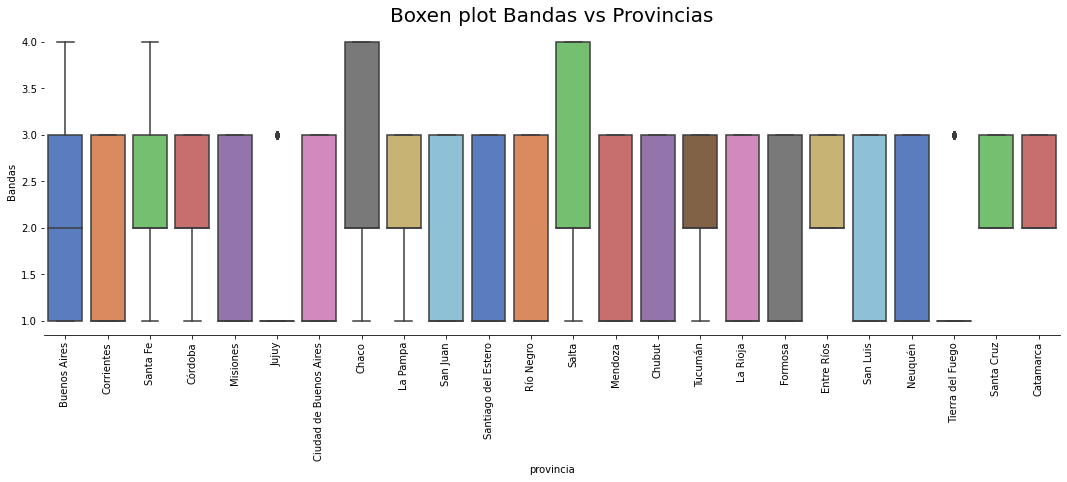

In [31]:
#Boxplot de "Bandas" vs Provincias
g = sns.catplot(x='provincia',y="Banda",data=alimentar, kind="box", height = 5,aspect=3 ,palette = "muted")
g.despine(left=True)
g.set_xticklabels(rotation=90)
g = g.set_ylabels("Bandas")
plt.title('Boxen plot Bandas vs Provincias',size = 20)
plt.show()

In [32]:
#Planteamos las bandas en una tabla, para verlo en valores totales según corresponda
pd.crosstab(alimentar['provincia'],alimentar['Banda'])

Banda                     1.0    2.0    3.0    4.0
provincia                                         
Buenos Aires            73964  82610  60473  10300
Catamarca                   0  12479   4195      0
Chaco                       2   5096      0   2353
Chubut                   9318      0   3436      0
Ciudad de Buenos Aires  30228      0  10823      0
Corrientes              36196      0  16262      0
Córdoba                     4  82736  34217      0
Entre Ríos                  0  26745  11184      0
Formosa                 22579      0   9907      0
Jujuy                   23950      0   7694      0
La Pampa                    3   7262   3022      0
La Rioja                11408      0   3949      0
Mendoza                 47638      0  21737      0
Misiones                42053      0  21556      0
Neuquén                 11572      0   4730      0
Río Negro               14679      0   5612      0
Salta                       1   4724      0   2145
San Juan                22086      0  11191      0
San Luis                12493      0   4376      0
Santa Cruz                  0   6641   2889      0
Santa Fe                    1  59113  22765    754
Santiago del Estero     37475      0  15313      0
Tierra del Fuego         2578      0    848      0
Tucumán                     1  51308  19548      0

In [33]:
#Estadísticas descriptivas de la columna "total liquidado"
alimentar['total_liquidado'].describe()

count    1.048575e+06
mean     3.447937e+04
std      7.401699e+03
min      2.000000e+04
25%      2.800000e+04
50%      3.200000e+04
75%      4.200000e+04
max      5.400000e+04
Name: total_liquidado, dtype: float64

In [34]:
media = np.mean(alimentar['total_liquidado'])
desvio = np.std(alimentar['total_liquidado'])
print (media)
print (desvio)

34479.36675965
7401.6951787424405


In [35]:
#Agregamos al análisis una tabla con la cantidad total de personas por provincia, para analizar la incidencia del plan
filas = np.shape(poblacion)[0]
print(f'Filas: {filas}')

columnas = np.shape(poblacion)[1]
print(f'Columnas:{columnas}\r\n')

print('Esta sería la base de datos de población total y cantidad de personas con tarjeta alimentAR:')
poblacion.head(25)

Filas: 24
Columnas:3

Esta sería la base de datos de población total y cantidad de personas con tarjeta alimentAR:


provincia     total  alimentar
0             Buenos Aires  15625084     227589
1                  Córdoba   3308876     116970
2                 Santa Fe   3194537      82640
3   Ciudad de Buenos Aires   2890151      41077
4                  Mendoza   1738929      69379
5                  Tucumán   1448188      70860
6               Entre Ríos   1235994      37931
7                    Salta   1214441       6880
8                 Misiones   1101593      63616
9                    Chaco   1055259       7454
10              Corrientes    992595      52467
11     Santiago del Estero    874006      52793
12                San Juan    681055      33280
13                   Jujuy    673307      31648
14               Río Negro    638645      20293
15                 Neuquén    551266      16305
16                 Formosa    530162      32489
17                  Chubut    509108      12756
18                San Luis    432310      16872
19               Catamarca    367828      16674
20                La Rioja    333642      15357
21                La Pampa    318951      10289
22              Santa Cruz    273964       9530
23        Tierra del Fuego    127205       3426

In [36]:
#Analizamos la incidencia del plan alimentAR en la población total de cada provincia
poblacion['total'] = poblacion['total'].astype(float)
poblacion['alimentar'] = poblacion['alimentar'].astype(float)


incidencia = pd.pivot_table(poblacion, index=["provincia"], values=['total','alimentar'],aggfunc=np.sum)
incidencia["%_Alimentar"] = incidencia["alimentar"]/ incidencia["total"] * 100

incidencia.sort_values(by=['%_Alimentar'],ascending=[False])


alimentar       total  %_Alimentar
provincia                                                 
Formosa                   32489.0    530162.0     6.128127
Santiago del Estero       52793.0    874006.0     6.040348
Misiones                  63616.0   1101593.0     5.774910
Corrientes                52467.0    992595.0     5.285842
Tucumán                   70860.0   1448188.0     4.893011
San Juan                  33280.0    681055.0     4.886536
Jujuy                     31648.0    673307.0     4.700382
La Rioja                  15357.0    333642.0     4.602838
Catamarca                 16674.0    367828.0     4.533097
Mendoza                   69379.0   1738929.0     3.989755
San Luis                  16872.0    432310.0     3.902755
Córdoba                  116970.0   3308876.0     3.535037
Santa Cruz                 9530.0    273964.0     3.478559
La Pampa                  10289.0    318951.0     3.225887
Río Negro                 20293.0    638645.0     3.177509
Entre Ríos                37931.0   1235994.0     3.068866
Neuquén                   16305.0    551266.0     2.957737
Tierra del Fuego           3426.0    127205.0     2.693290
Santa Fe                  82640.0   3194537.0     2.586916
Chubut                    12756.0    509108.0     2.505559
Buenos Aires             227589.0  15625084.0     1.456562
Ciudad de Buenos Aires    41077.0   2890151.0     1.421275
Chaco                      7454.0   1055259.0     0.706367
Salta                      6880.0   1214441.0     0.566516

In [43]:
incidencia['NUMERO'] = incidencia['NUMERO'].astype(float)

In [44]:
mapamundi = mapamundi.merge(
                     right = incidencia,
                     left_on = 'OBJECTID',
                     right_on = 'OBJECTID',
                     how = 'left'
                     )

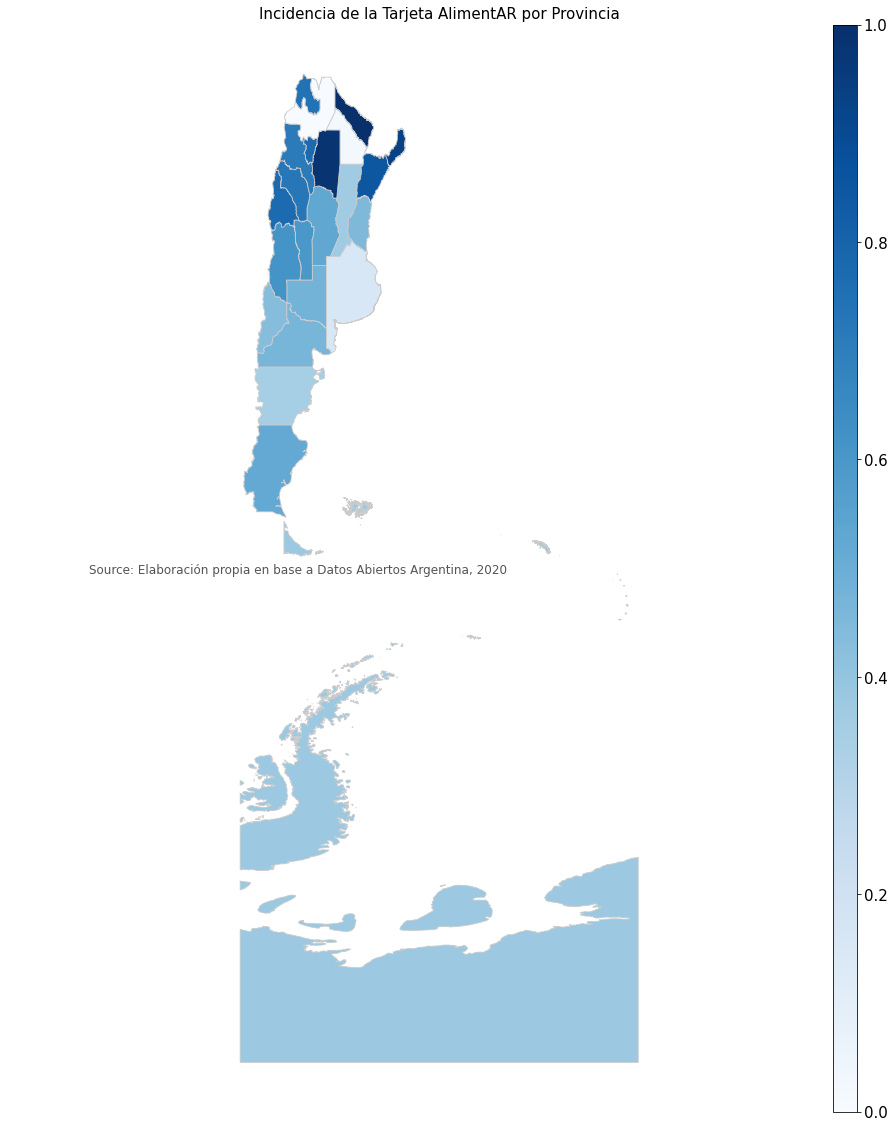

In [45]:
vmin, vmax = 0, 1
fig, ax = plt.subplots(1, figsize=(15, 20))

mapamundi.plot(column='NUMERO', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
plt.title("Incidencia de la Tarjeta AlimentAR por Provincia",size=15)
plt.axis('off')
plt.annotate('Source: Elaboración propia en base a Datos Abiertos Argentina, 2020',size=15,xy=(0.1, 0.5),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.05)

cbar = fig.colorbar(sm, cax=cax)
cbar.ax.tick_params(labelsize=15) 
plt.show()

## Machine Learning

#### Regresión Lineal

Se procederá a utilizar un modelo de aprendizaje supervisado - regresión lineal

Vamos a realizar una tabla de la cantidad de personas que se incribieron por día, inicialmente en Buenos Aires


In [46]:
ML = alimentar.groupby("fecha_alta").count().reset_index()
ML = ML.drop(ML.columns[[2,3,4,5,6,7,8,9]], axis='columns')
ML

fecha_alta  id_persona
0     1/10/20        5719
1     1/14/20        1544
2     1/15/20        1970
3     1/20/20        3363
4     1/22/20        9914
5     1/24/20        1537
6     1/27/20       10598
7     1/28/20        1524
8     1/29/20        1002
9     1/30/20       12018
10    2/10/20       57464
11    2/12/20      159274
12    2/14/20       14398
13    2/18/20       10284
14    2/20/20        9578
15    2/26/20       11124
16    2/27/20       49239
17    2/28/20       40463
18     2/3/20       70856
19     2/6/20        9530
20     3/1/20      448468
21     3/2/20        8275
22     3/3/20       16784
23     3/4/20       25991
24     3/5/20       13715
25     3/6/20       42880
26     3/9/20       10613
27     5/1/20         450

In [47]:
ML.insert(0,'ID', range(1,1+len(ML)))
ML

ID fecha_alta  id_persona
0    1    1/10/20        5719
1    2    1/14/20        1544
2    3    1/15/20        1970
3    4    1/20/20        3363
4    5    1/22/20        9914
5    6    1/24/20        1537
6    7    1/27/20       10598
7    8    1/28/20        1524
8    9    1/29/20        1002
9   10    1/30/20       12018
10  11    2/10/20       57464
11  12    2/12/20      159274
12  13    2/14/20       14398
13  14    2/18/20       10284
14  15    2/20/20        9578
15  16    2/26/20       11124
16  17    2/27/20       49239
17  18    2/28/20       40463
18  19     2/3/20       70856
19  20     2/6/20        9530
20  21     3/1/20      448468
21  22     3/2/20        8275
22  23     3/3/20       16784
23  24     3/4/20       25991
24  25     3/5/20       13715
25  26     3/6/20       42880
26  27     3/9/20       10613
27  28     5/1/20         450

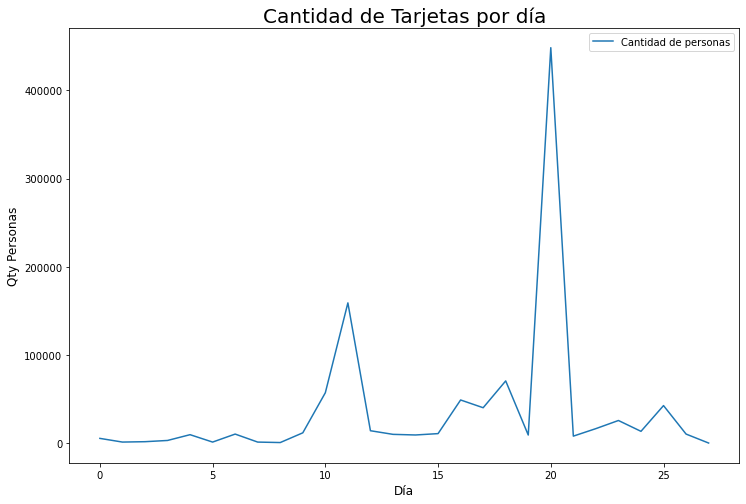

In [48]:
plt.figure(figsize=(12,8))
plt.plot(ML.index, ML['id_persona'], label='Cantidad de personas');
plt.legend(loc='upper right')
plt.title('Cantidad de Tarjetas por día', size=20)
plt.ylabel('Qty Personas',size=12)
plt.xlabel('Día',size=12)
plt.show()

In [49]:
#Regresión Lineal
x = np.array(ML[["ID"]])
y = np.array(ML[["id_persona"]])

In [50]:
ML.describe()

ID     id_persona
count  28.000000      28.000000
mean   14.500000   37449.107143
std     8.225975   86880.865987
min     1.000000     450.000000
25%     7.750000    5130.000000
50%    14.500000   10605.500000
75%    21.250000   29609.000000
max    28.000000  448468.000000

In [51]:
y.shape

(28, 1)

In [52]:
#Dividimos nuestros datos x e y en train 50% / test 50%
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.50, random_state=20)

In [53]:
#Modelo RL
lr = LinearRegression()

In [54]:
lr.fit(xtrain, ytrain)

LinearRegression()

In [55]:
ypred = lr.predict(xtest)
ypred.shape

(14, 1)

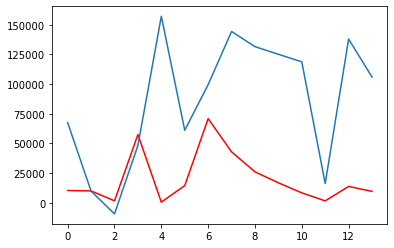

In [56]:
f1 = plt.plot(ytest, c='red')
f2 = plt.plot(ypred)
plt.show()

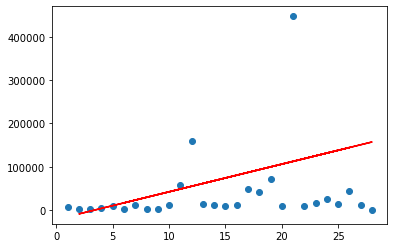

In [57]:
plt.scatter(x, y)
plt.plot(xtest, ypred, color='red')
plt.show()

In [58]:
r2_score(ytest, ypred)

-15.520940320328783

In [59]:
np.sqrt(mean_squared_error(ytest, ypred))

85096.85094043694

In [60]:
mean_squared_error(ytest, ypred)

7241474039.978944

In [61]:
mean_absolute_error(ytest, ypred)

69342.91633226327

Es interesante ver que los dos valores por encima de los 100.000 son outliers bien marcados del dataset. Durante esos dos días se incribieron un 40% aproximadamente del padrón actualizado en el .csv

A modo de generar una "mejor" predición, se eliminaran los mismos, a pesar de que no sea estrictamente correcto.

In [62]:
ML2 = ML.drop(ML[ML['id_persona']>100000].index)
ML2

ID fecha_alta  id_persona
0    1    1/10/20        5719
1    2    1/14/20        1544
2    3    1/15/20        1970
3    4    1/20/20        3363
4    5    1/22/20        9914
5    6    1/24/20        1537
6    7    1/27/20       10598
7    8    1/28/20        1524
8    9    1/29/20        1002
9   10    1/30/20       12018
10  11    2/10/20       57464
12  13    2/14/20       14398
13  14    2/18/20       10284
14  15    2/20/20        9578
15  16    2/26/20       11124
16  17    2/27/20       49239
17  18    2/28/20       40463
18  19     2/3/20       70856
19  20     2/6/20        9530
21  22     3/2/20        8275
22  23     3/3/20       16784
23  24     3/4/20       25991
24  25     3/5/20       13715
25  26     3/6/20       42880
26  27     3/9/20       10613
27  28     5/1/20         450

In [63]:
#Regresión Lineal
x1 = np.array(ML2[["ID"]])
y1 = np.array(ML2[["id_persona"]])

In [64]:
#Dividimos nuestros datos x e y en train 50% / test 50%
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(x1, y1, test_size=0.50, random_state=20)

In [65]:
#Modelo RL
lr1 = LinearRegression()

In [66]:
lr1.fit(xtrain1, ytrain1)

LinearRegression()

In [67]:
ypred1 = lr1.predict(xtest1)
ypred1.shape

(13, 1)

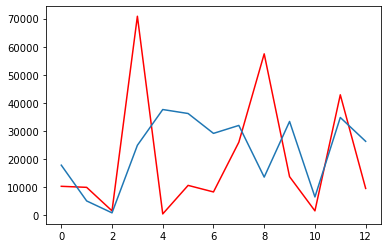

In [68]:
f11 = plt.plot(ytest1, c='red')
f21 = plt.plot(ypred1)
plt.show()

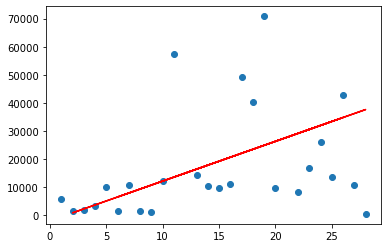

In [69]:
plt.scatter(x1, y1)
plt.plot(xtest1, ypred1, color='red')
plt.show()

In [70]:
r2_score(ytest1, ypred1)

-0.19471701041405387

In [71]:
np.sqrt(mean_squared_error(ytest1, ypred1))

23837.687373147233

In [72]:
mean_squared_error(ytest1, ypred1)

568235339.299903

In [73]:
mean_absolute_error(ytest1, ypred1)

18618.560874542127

Mejoran las métricas pero no es estrictamente correcto quitar esos outliers que representan el 40% de las personas adheridas al plan.
Por otra parte, mejoraría mucho los resultados contar con mayor cantidad de meses, siendo que el dataset subido en Septiembre cuenta solo con datos a Mayo.

Esta regresión lineal bajo el contexto de análisis simplifica mucho la respuesta.


#### SVR

In [104]:
#SVR
x2 = np.array(ML[["ID"]])
y2 = np.array(ML[["id_persona"]])

In [75]:
#Dividimos nuestros datos x e y en train 50% / test 50%
x_train, x_test, y_train, y_test = train_test_split(x2, y2, test_size=0.50, random_state=20)

In [76]:
scal_x = MinMaxScaler().fit(x_train)
x_train_scal = scal_x.transform(x_train)
x_test_scal = scal_x.transform(x_test)

In [77]:
scal_y = MinMaxScaler().fit(y_train)
y_train_scal = scal_y.transform(y_train)
y_test_scal = scal_y.transform(y_test)

In [78]:
parametros = {'kernel':['rbf', 'poly'], 'degree':(1, 2, 3), 'C':(1, 10, 100), 'gamma':['auto', 'scale'], 'tol':[0.0001, 0.001, 0.01, 0.1]}

In [79]:
svm_regresion = SVR()

In [80]:
svm_grid = GridSearchCV(estimator=svm_regresion, param_grid=parametros, scoring='neg_mean_squared_error', n_jobs=-1, cv=5, refit=True)
svm_grid.fit(x_train_scal, y_train_scal.reshape(-1, ))

GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': (1, 10, 100), 'degree': (1, 2, 3),
                         'gamma': ['auto', 'scale'], 'kernel': ['rbf', 'poly'],
                         'tol': [0.0001, 0.001, 0.01, 0.1]},
             scoring='neg_mean_squared_error')

In [81]:
svm_grid.best_params_

{'C': 1, 'degree': 1, 'gamma': 'auto', 'kernel': 'rbf', 'tol': 0.001}

In [82]:
y_pred = scal_y.inverse_transform(svm_grid.predict(x_test_scal).reshape(-1, 1))

In [83]:
r2_score(y_test, y_pred)

-2.1788121729113215

In [84]:
np.sqrt(mean_squared_error(y_test, y_pred))

37327.46883888595

In [85]:
mean_squared_error(y_test, y_pred)

1393339929.9180014

In [86]:
mean_absolute_error(y_test, y_pred)

34669.91841170546

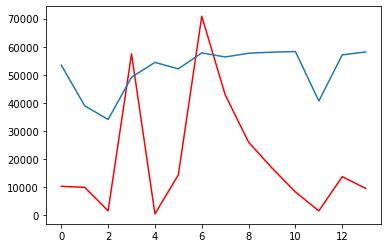

In [87]:
f1 = plt.plot(y_test, c='red')
f2 = plt.plot(y_pred)
plt.show()

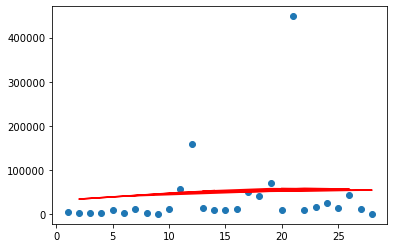

In [88]:
plt.scatter(x2, y2)
plt.plot(x_test, y_pred, color='red')
plt.show()

In [105]:
#SVR sin outliers
x3 = np.array(ML2[["ID"]])
y3 = np.array(ML2[["id_persona"]])

In [90]:
#Dividimos nuestros datos x e y en train 50% / test 50%
x_train, x_test, y_train, y_test = train_test_split(x3, y3, test_size=0.50, random_state=20)

In [91]:
scal_x = MinMaxScaler().fit(x_train)
x_train_scal = scal_x.transform(x_train)
x_test_scal = scal_x.transform(x_test)

In [92]:
scal_y = MinMaxScaler().fit(y_train)
y_train_scal = scal_y.transform(y_train)
y_test_scal = scal_y.transform(y_test)

In [93]:
parametros = {'kernel':['rbf', 'poly'], 'degree':(1, 2, 3), 'C':(1, 10, 100), 'gamma':['auto', 'scale'], 'tol':[0.0001, 0.001, 0.01, 0.1]}

In [94]:
svm_regresion = SVR()

In [95]:
svm_grid = GridSearchCV(estimator=svm_regresion, param_grid=parametros, scoring='neg_mean_squared_error', n_jobs=-1, cv=5, refit=True)
svm_grid.fit(x_train_scal, y_train_scal.reshape(-1, ))

GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': (1, 10, 100), 'degree': (1, 2, 3),
                         'gamma': ['auto', 'scale'], 'kernel': ['rbf', 'poly'],
                         'tol': [0.0001, 0.001, 0.01, 0.1]},
             scoring='neg_mean_squared_error')

In [96]:
svm_grid.best_params_

{'C': 1, 'degree': 1, 'gamma': 'auto', 'kernel': 'rbf', 'tol': 0.1}

In [97]:
y_pred = scal_y.inverse_transform(svm_grid.predict(x_test_scal).reshape(-1, 1))

In [98]:
r2_score(y_test, y_pred)

-0.0913376112393185

In [99]:
np.sqrt(mean_squared_error(y_test, y_pred))

22783.012977452618

In [100]:
mean_squared_error(y_test, y_pred)

519065680.3307744

In [101]:
mean_absolute_error(y_test, y_pred)

16369.875920256804

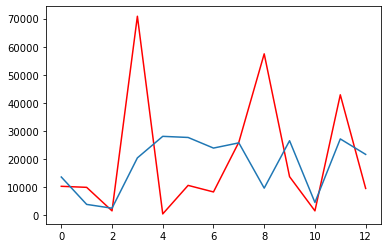

In [102]:
f1 = plt.plot(y_test, c='red')
f2 = plt.plot(y_pred)
plt.show()

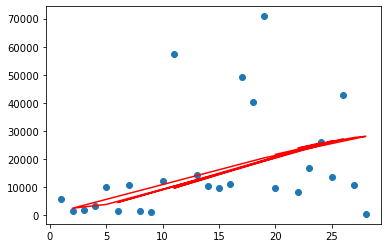

In [103]:
plt.scatter(x3, y3)
plt.plot(x_test, y_pred, color='red')
plt.show()